<a href="https://colab.research.google.com/github/TinNyeinThiriLwin/data-analytics-portfolio/blob/main/SalesDataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-cloud-bigquery pandas-gbq


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.cloud import bigquery
import pandas as pd

In [4]:
client = bigquery.Client()


In [8]:
project_id = 'analyticsprojecttntl'

In [9]:
client = bigquery.Client(project=project_id)


In [10]:
query = """
SELECT *
FROM sales_dataset.transactions
LIMIT 10
"""


In [11]:
df = client.query(query).to_dataframe()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Total Sales Over Time
This line chart shows the trend of total sales over time, indicating peaks and troughs in sales.

In [13]:
query_sales_over_time = """
SELECT
      DATE(date) as sale_date,
      round(Sum(TotalAmount)) as total_sales
from sales_dataset.transactions
group by sale_date
order by sale_date;
"""



In [14]:
df_sales_over_time = client.query(query_sales_over_time).to_dataframe()


In [15]:
df_sales_over_time.head()

,sale_date,total_sales
0,2020-01-01,4008.0
1,2020-01-02,4085.0
2,2020-01-03,4112.0
3,2020-01-04,3797.0
4,2020-01-05,3680.0


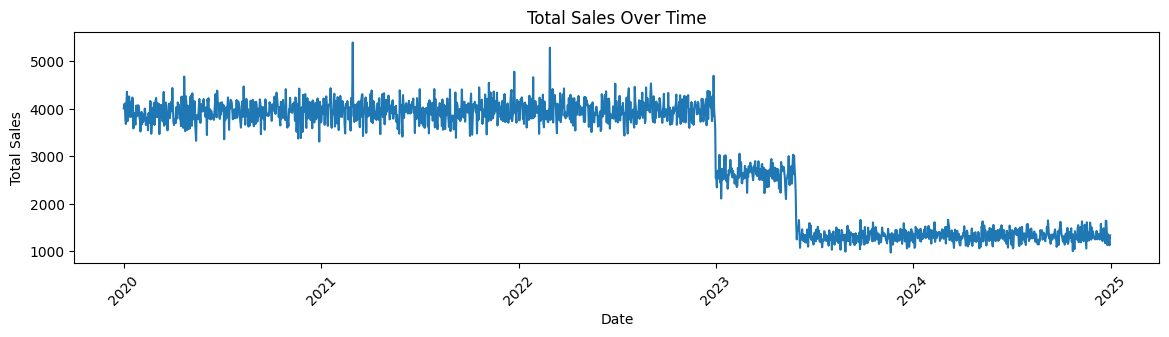

In [17]:
plt.figure(figsize=(14, 3))
sns.lineplot(data=df_sales_over_time, x='sale_date', y='total_sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Monthly Sales Trends
This line chart highlights the monthly sales trends, showing how sales vary across different months.

In [18]:
query_monthly_sales_trends = """
SELECT
    format_date('%Y-%m', date) as sale_month,
    round(sum(TotalAmount)) as total_sales
FROM sales_dataset.transactions
group by sale_month
order by sale_month;
"""

In [19]:
df_monthly_sales_trends = client.query(query_monthly_sales_trends).to_dataframe()

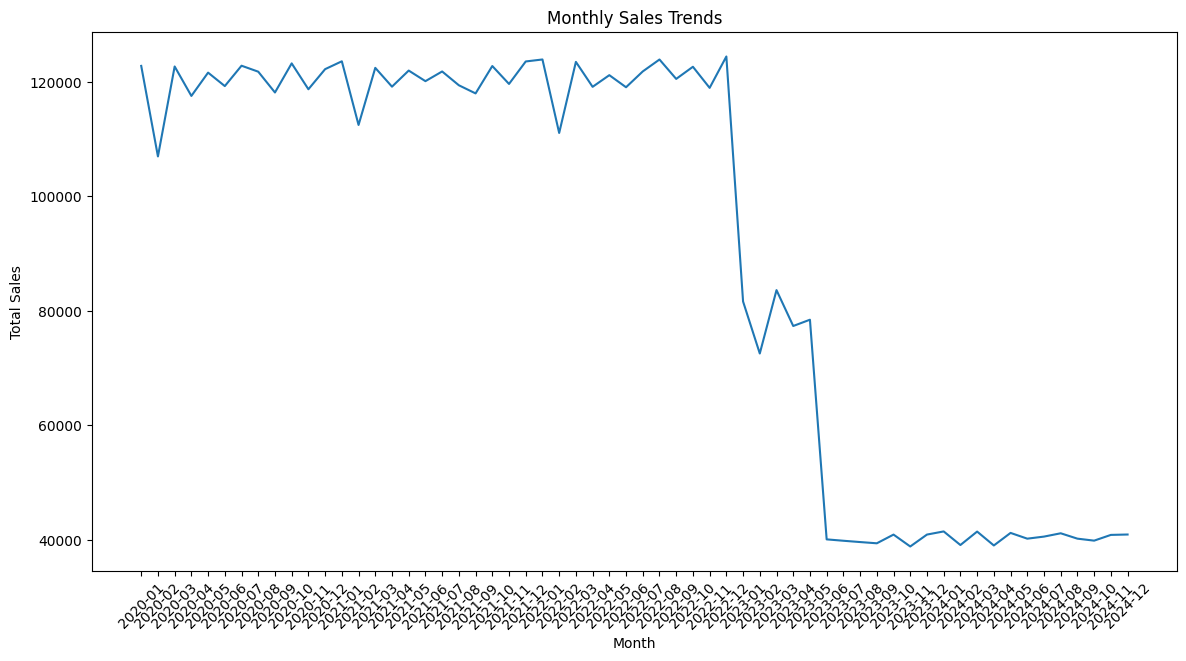

In [20]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_monthly_sales_trends, x='sale_month', y='total_sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### Total Sales by Store
This bar chart compares the total sales across different stores, identifying the top-performing stores.

In [21]:
query_sales_by_store = """
SELECT  S.StoreName,
        round(sum(T.TotalAmount)) AS total_sales
FROM sales_dataset.transactions T
LEFT JOIN sales_dataset.stores S ON T.StoreID = S.StoreID
GROUP BY S.StoreName
ORDER BY S.StoreName;
"""

In [24]:
df_sales_by_store = client.query(query_sales_by_store).to_dataframe()

In [26]:
fig = px.bar(df_sales_by_store, x='StoreName', y='total_sales', title='Total Sales by Store')
fig.show()

### Sales Amount by Age Group
This bar chart segments the sales amount by different age groups, showing which age group contributes the most to sales.

In [27]:
query_sales_by_age_group = """
SELECT
        CASE
            WHEN C.Age >= 18 AND C.Age <= 25 THEN '18-25 age group'
            WHEN C.Age >= 26 AND C.Age <= 50 THEN '26-50 age group'
            ELSE 'Others'
        END AS Age_Group,
        ROUND(SUM(T.TotalAmount)) AS Sales_Amount
FROM sales_dataset.transactions T
LEFT JOIN sales_dataset.customers C ON T.CustomerID = C.CustomerID
GROUP BY Age_Group
ORDER BY Sales_Amount DESC;
"""

In [28]:
df_sales_by_age_group = client.query(query_sales_by_age_group).to_dataframe()

In [29]:
fig = px.bar(df_sales_by_age_group, x='Age_Group', y='Sales_Amount', title='Sales Amount by Age Group')
fig.show()